Load data

In [10]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


# Load the reduced MNIST digits dataset
digits = datasets.load_digits()

# Get the data and target labels
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset information
print("Training data shape:", X_train.shape)
print("Training target shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing target shape:", y_test.shape)

Training data shape: (1437, 64)
Training target shape: (1437,)
Testing data shape: (360, 64)
Testing target shape: (360,)


# 1. k-Nearest Neighbors

Implement kNN classification for the above dataset.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Initialize the kNN classifier with a specific k value
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9833333333333333


Compute and plot the accuracy scores by k values.

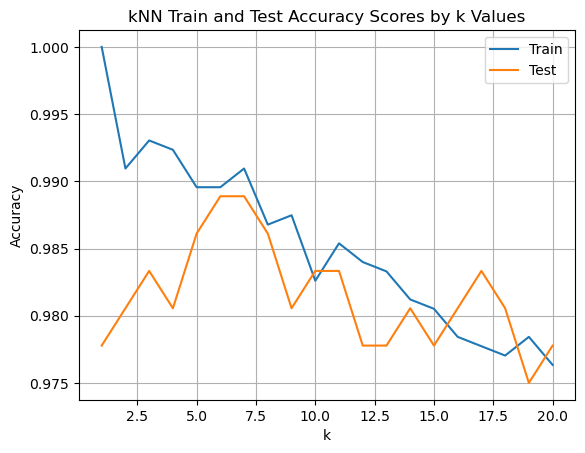

In [16]:
import matplotlib.pyplot as plt

# Define the range of k values
k_values = list(range(1, 21))
train_accuracy_scores = []
test_accuracy_scores = []

# Compute accuracy scores for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Train accuracy
    y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracy_scores.append(train_accuracy)
    
    # Test accuracy
    y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracy_scores.append(test_accuracy)

# Plot the train and test accuracy scores by k values
plt.plot(k_values, train_accuracy_scores, label='Train')
plt.plot(k_values, test_accuracy_scores, label='Test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('kNN Train and Test Accuracy Scores by k Values')
plt.legend()
plt.grid()
plt.show()

Make conclusions about which k is the best.

6
This k value provides a balance between train and test accuracies which is highest test accuracy and lower train accuracy.The higher train accuracy would cause overfitting.

# 2. Support Vector Machine

Implement SVM classifier for MNIST dataset.

In [19]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a specific kernel
kernel = 'linear'
svm = SVC(kernel=kernel, random_state=42)

# Train the classifier on the training set
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for kernel", kernel ,":",accuracy)

Accuracy for kernel linear : 0.9777777777777777


Compute and compare the accuracy scores for at least 3 different kernels by using
metrics.classification_report.

In [24]:
from sklearn.metrics import classification_report

# Define the kernels to compare
kernels = ['linear', 'rbf', 'poly','sigmoid']

# Compute accuracy scores and classification reports for different kernels
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Accuracy for kernel", kernel ,":",accuracy)
    print("Classification report for kernel", kernel, ":\n",report)

Accuracy for kernel linear : 0.9777777777777777
Classification report for kernel linear :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Accuracy for kernel rbf : 0.9861111111111112
Classification report for kernel rbf :
               precision    recall  f1-score   support

          

Make conclusion about which kernel should be used in this case.

Based on the precision, recall, f1-score and Accuracy, kernel poly is the best.

# 3. Naïve Bayes

Compute the accuracy scores and plot the confusion matrix of the same dataset using
Naïve Bayes classifier. Hint: from sklearn.metrics import confusion_matrix

Accuracy using Naïve Bayes classifier: 0.8472222222222222


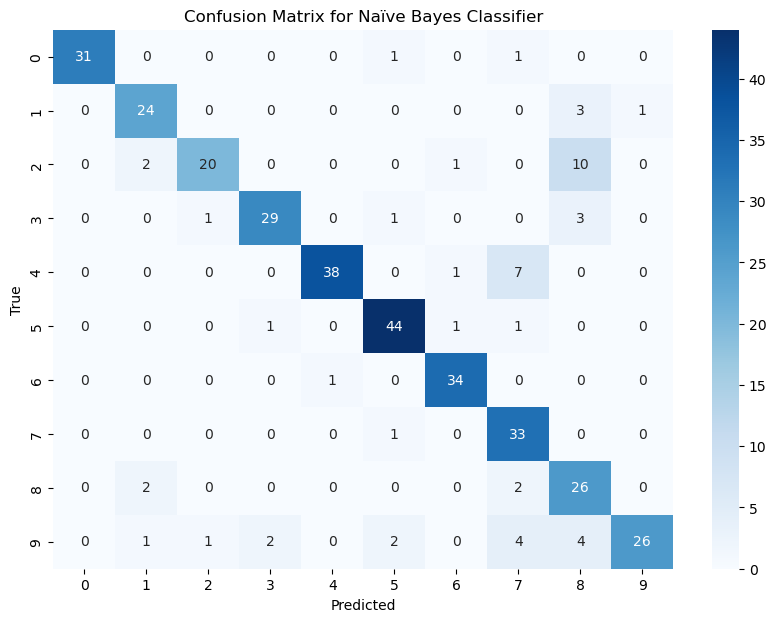

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize the Naïve Bayes classifier
nb = GaussianNB()

# Train the classifier on the training set
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy using Naïve Bayes classifier:", accuracy)

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naïve Bayes Classifier')
plt.show()

Compare the accuracy of different classifiers in the same plot.

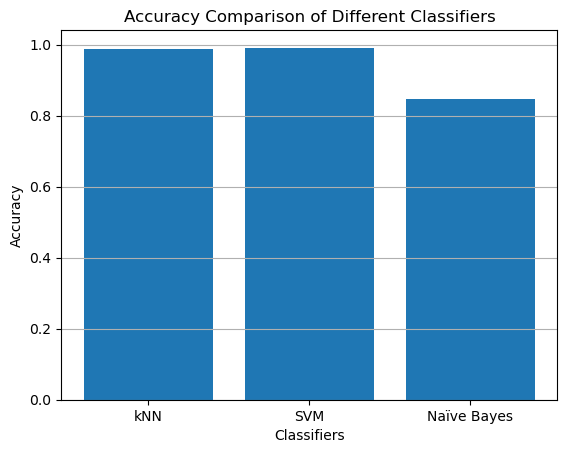

In [30]:
# kNN classifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# SVM classifier
svm = SVC(kernel='poly', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred)

# Compare accuracies
classifiers = ['kNN', 'SVM', 'Naïve Bayes']
accuracies = [knn_accuracy, svm_accuracy, nb_accuracy]

plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.grid(axis='y')
plt.show()